## Programming for Data Analyis Project Semester (2) 2020
Brendan Ryan GMIT

## Project Overview

For this project I have picked a real world phenomenon that exists in my own professional worplace which is a credit union.

That is what  is the likelyhood of a member of the financial institution I work in availing of a service (in this case avail of a loan), based on variables that are contained in a pre existing database - for my project I will look at the variables listed below

- AGE
- Month (month of application)
- Date (date of appliation)
- Employment Status
- Gender
- Loan Type
- Loan Amount Range
- Loan Amount


My main aim is to be able to determine the particular loan type that will be availabe of by Age and Gender.

#### Project Aims

The aim of this project is to extract and analyise a real world phenomenon which is lending by age profile and from this try and determine the probabilites of loan products by age group and gender.

I will do this analysis using Python code through a jupyter notebook and utilising various additional libraries will review and analise my dataset. 

In particular I want to look for any relationships between the variables and their likely distributions. 

From this research I then aim to create a synthetic simulated data set that will match as closely to my real world dataset. This simulated dataset could then be used for further testing and with a view to making predictions etc

#### How did i obtain the data?

I obtained the data from an internal system using Business Intellegince software. That software that was used was Pentago BI. 
I extracted the data I felt I needed (the varibales) and this data was extracted/exported to a csv file. This was ideal as phython and pandas is widely used to analysise data contained in the CSV file format. The CSV file is saved in my repository as analysis.csv. This csv does not contain any presonal information and is used more for identifying trends.

#### External Research of borrowing by Age profile

The majority of my analysis will be based around the data that i have extracted i.e the real life data. There is a wealth of data availabel online however i felt most of this data related more to the mortage market and outstanding debit where i am more interested in this particular project to look at new borrowing and the profile of same. However i feel that with this course and futher reading and experimenting i will do a project on loans outstading by difference demographics etc and analysise trends over a number of years. I will however include the following as i found them interesting and i will quote external sources in some of my findings as we analise the data further.

In the graph below which shows the number of products held by age profile in a sample financial instituion. It is intersting to note here that number of products held (including loans) starts to rise sharply from age 30 - peaking in the age group 45 - 54 and then delcining from age 55 onwards - it will be interesting to see if this is similar ot the patter or loans applied for by age groups in my dataset. - source https://www.cso.ie/en/releasesandpublications/ep/p-hfcs/householdfinanceandconsumptionsurvey2018/debtandcredit/

<img src="images/image1.jpg">

Again in the next graph we can see the Distribution of average debt from personal loans* in the United Kingdom (UK) 2017, by age profile - although this graph looks at the debt outstanding it also gives usa nother indication as to the age profile of peronal lending. - https://www.statista.com/statistics/793646/average-amount-owed-in-loans-uk/

<img src="images/image2.jpg">

As we can see from the graph above the main age mean is approx 40 years old increasing from age 25 upwards and declinning again from age 45 onwards - I would expect to see this follow through in the analysis of my own data set  -lets see

#### Getting Started

Import the required libraries

In [1]:
#code to import pandas is a software library for data manipulation and analysis
import pandas as pd
#code to import numpy for working with arrays scientific computer etc 
import numpy as np
#code to import matplotlib plotting library
import matplotlib.pyplot as plt
#code to import seaborn - more plots better visual
import seaborn as sns
#magic code to show plots as required 
%matplotlib inline

Import our Data Set based on the output of ones years lending - we are going to use Pandas library to read and for analysing our data set.

In [2]:
#import my dataset and best practice name as df
df = pd.read_csv('analysis.csv')

## Test that our data set has loaded and check for errors 

In [3]:
df
# I can if i want if its a large dataset only return lets say 100 rows ** come back to this 

,age,month_application,date_application,employment_status,gender,loan_purpose,loan_amount_range,loan_amount
0,19,October,04/10/2019,FULL TIME,Male,Car,"10,001 - 15,000",13000.0
1,19,August,28/08/2019,STUDENT,Male,Student,"1,001 - 5,000",3000.0
2,19,March,28/03/2019,FULL TIME,Male,Personal,"5,001 - 10,000",7000.0
3,19,September,28/09/2019,STUDENT,FEMALE,Student,"0 - 1,000",1000.0
4,19,August,22/08/2019,STUDENT,Male,Student,"5,001 - 10,000",10000.0
...,...,...,...,...,...,...,...,...
3931,85,June,07/06/2019,RETIRED,FEMALE,Personal,"0 - 1,000",600.0
3932,85,February,25/02/2019,RETIRED,FEMALE,Personal,"0 - 1,000",1000.0
3933,85,December,02/12/2019,RETIRED,FEMALE,Personal,"1,001 - 5,000",2000.0
3934,87,March,01/03/2019,RETIRED,FEMALE,Personal,"1,001 - 5,000",2000.0


Ok from above we can determine we have 3936 rows of date with 8 colums

#### df.head and df.tail
Now lets further analyse and examine our imported data by using df.head and df.tail functions that are available in pandas.

Firstly df.head() function returns the first 5 rows (default) -  both functions are useful for quickly testing if our dataset has the right type of data in it.

In [4]:
#pandas df.head fucntion default is to return 5 rows
df.head()

,age,month_application,date_application,employment_status,gender,loan_purpose,loan_amount_range,loan_amount
0,19,October,04/10/2019,FULL TIME,Male,Car,"10,001 - 15,000",13000.0
1,19,August,28/08/2019,STUDENT,Male,Student,"1,001 - 5,000",3000.0
2,19,March,28/03/2019,FULL TIME,Male,Personal,"5,001 - 10,000",7000.0
3,19,September,28/09/2019,STUDENT,FEMALE,Student,"0 - 1,000",1000.0
4,19,August,22/08/2019,STUDENT,Male,Student,"5,001 - 10,000",10000.0


In [5]:
#pands df.tail function by default reuturns last 5 rows 
df.tail()

,age,month_application,date_application,employment_status,gender,loan_purpose,loan_amount_range,loan_amount
3931,85,June,07/06/2019,RETIRED,FEMALE,Personal,"0 - 1,000",600.0
3932,85,February,25/02/2019,RETIRED,FEMALE,Personal,"0 - 1,000",1000.0
3933,85,December,02/12/2019,RETIRED,FEMALE,Personal,"1,001 - 5,000",2000.0
3934,87,March,01/03/2019,RETIRED,FEMALE,Personal,"1,001 - 5,000",2000.0
3935,89,March,28/03/2019,RETIRED,FEMALE,Personal,"1,001 - 5,000",3000.0


Everything looks ok above we can see the shape of our dataframe is correct

Lets have a look at the typoe of varibables we have to work with using the df.dtypes function 

In [6]:
#using pandas df.types to looking at the data types 
df.dtypes

age                    int64
month_application     object
date_application      object
employment_status     object
gender                object
loan_purpose          object
loan_amount_range     object
loan_amount          float64
dtype: object

Ok as we can see from above we are dealing with 3 different data types - 
- int64 for age
- object for the variables month_application,date_application, employment_status,gender,loan_purpose, loan_amount_range
- float64 for the loan_amount

Looking at the above results we can assertain that we need to covert the date of application to a date_time type rather than an object which it currently is

In [7]:
#look at making the Financial month a date time # help from https://https://pbpython.com/pandas_dtypes.html
#https://stackoverflow.com/questions/16852911/how-do-i-convert-dates-in-a-pandas-data-frame-to-a-date-data-type
#new_date = df['date_application2']
#df['date_application2'] = pd.to_datetime(df['date_application'])
df["new_date_application"]= pd.to_datetime(df['date_application'])

#### df.info()
Lets have a look at df.info which is another useful tool to give us more info on our dataframe and to check has our to date time  above worked. I will leave both the date_application and the new_date_application in my data frame to show the differnce.

In [8]:
#using pandas built in function df.info to us more info including each data type in use
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   age                   3936 non-null   int64         
 1   month_application     3936 non-null   object        
 2   date_application      3936 non-null   object        
 3   employment_status     3936 non-null   object        
 4   gender                3936 non-null   object        
 5   loan_purpose          3936 non-null   object        
 6   loan_amount_range     3936 non-null   object        
 7   loan_amount           3936 non-null   float64       
 8   new_date_application  3936 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 276.9+ KB


As we can see above we have a colum new_date_application which is dytpe of datetime64[ns]

In [49]:
#using pands df.describe to give us more statistical info
df.describe().round(decimals = 0)

,age,loan_amount,month_number
count,3936.0,3936.0,3936.0
mean,45.0,4756.0,7.0
std,16.0,8384.0,3.0
min,19.0,0.0,1.0
25%,32.0,700.0,4.0
50%,44.0,2000.0,7.0
75%,57.0,5000.0,10.0
max,89.0,102500.0,12.0


Ok as Age and Loan Amount are our only columns of type integer/floating points they are the only ones which will be returned for statistical values as shown above.

So using the pandas df.desribe function we get some insteresting statistics for the age and the loan amounts,
The average age of our borower is 45 years old, this corresponds with out reasearch above which showed the average age of a borrower as approx 40 years to 45 years. We can determine the average loan amount is approx €4,756. 
We will cross check these stats further on in our sythentic data set to make sure they align and to ensure our sythentic dataset is a valid represenation.

### Best practice convert some of our data types into categories

https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

The Pandas documentation has a consise section on when to use the categorical data type and they recommend it should be use the following data type:



- A string variable consisting of only a few different values. Converting such a string variable to a categorical variable will save some memory, see here.

- The lexical order of a variable is not the same as the logical order (“one”, “two”, “three”). By converting to a categorical and specifying an order on the categories, sorting and min/max will use the logical order instead of the lexical order, see here.

- As a signal to other Python libraries that this column should be treated as a categorical variable (e.g. to use suitable statistical methods or plot types).

In [10]:
#convert required varibales to cateogories
df[["month_application","gender", "employment_status","loan_purpose"]] = df[["month_application","gender", "employment_status","loan_purpose"]].astype("category")

In [50]:
#using pandas built in function df.info to us more info including each data type in use
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   age                   3936 non-null   int64         
 1   month_application     3936 non-null   category      
 2   date_application      3936 non-null   object        
 3   employment_status     3936 non-null   category      
 4   gender                3936 non-null   category      
 5   loan_purpose          3936 non-null   category      
 6   loan_amount_range     3936 non-null   object        
 7   loan_amount           3936 non-null   float64       
 8   new_date_application  3936 non-null   datetime64[ns]
 9   month_number          3936 non-null   int64         
dtypes: category(4), datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 201.1+ KB


Ok as we can see from above by changing some of our data types from objects to categoires the memory ussag has almost halfed from 246 kb to 149kb - this may not mean alot for this dataset but if we want to analyse a number of years data or other large datasets the efficiency in memory usage would be very benefiical and result in our code running faster.

### Add additional numerical value data by coverting month of application into a number 

As the project progressed i noticed that for ease of generating random data, looking at the stats of this random data and for the relationships that I required more numerical data. Figuring out the correlation between variables was also only possible using numberical values. It was for that reason I decied to covered my month of application data to numerical.


In [52]:
#generate a month number for each month of application
df['month_number'] = pd.DatetimeIndex(df['new_date_application']).month

## Reviewing the data to figure out the types of distributions

The main aim in this analysis is to look at the distribution of the age and gender data then look at the relationship between the age and gender of the borrower against the loan pupose and then investigate the relationship between the loan pupose and the amount amount borrowed. We will then use our findings to help create a synthetic data set.

### Analyse Age data and Distribution

In [53]:
#using pandas.describe function to return stats and .round to round values for presentation
df.age.describe().round()

count    3936.0
mean       45.0
std        16.0
min        19.0
25%        32.0
50%        44.0
75%        57.0
max        89.0
Name: age, dtype: float64

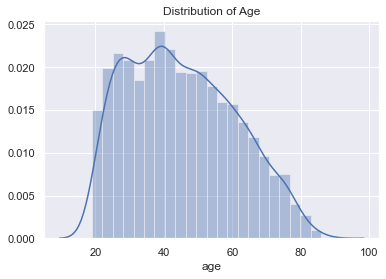

In [116]:
#declare the variable age - can call directly from dataframe also! will use further on
age = df["age"]
#use a displot from seaborn for visualisation 
sns.distplot(age);
#give the plot a title 
plt.title("Distribution of Age")
#show the plot
plt.show()

We can see from using df.describe and visualised using our plot the average age of the borrower is 45 - the minimum age is 19 and the max age of a borrower is 89. 

Based on the above and after much research i have have decided that our age distribution matches closest to that of a Triangular Disbtribution and i will discuss that futher below when creating my sample Age data.

### Analysis Loan Amount Data and Distribution

In [113]:
#perform a pandas df.desribe for stats on loan_amount
df.loan_amount.describe().round(2)

count      3936.00
mean       4755.63
std        8383.67
min           0.00
25%         700.00
50%        2000.00
75%        5000.00
max      102500.00
Name: loan_amount, dtype: float64

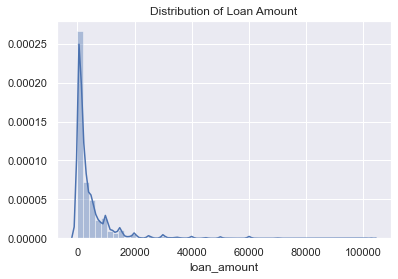

In [115]:
#create a seaborn displot to visualise the distribution
sns.distplot(df["loan_amount"]);
plt.title("Distribution of Loan Amount")
#give the plot a title
plt.show()

My research pointed me towards a pareto distribution or a Exponential Distirbution  but i found it quiet difficult to code random sample data based on these distributions. 

### Analyse Loan Purpose Data and Distribution

To analyse my loan_puopose column in my dataframe i am going to use a category plot from seaborn. This is a nice visual plot and by using the kind = count will count the number of times each value is found.

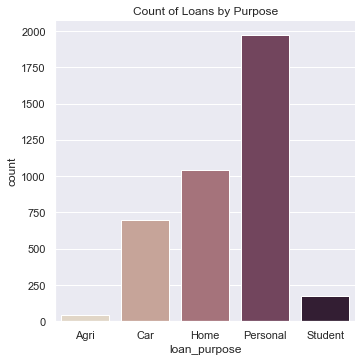

In [111]:
sns.catplot(x="loan_purpose", kind="count", palette="ch:.25", data=df);
#Give the plot a title 
plt.title("Count of Loans by Purpose")
#https://seaborn.pydata.org/tutorial/categorical.html
#show the plot 
plt.show()

So we can see above that ther are 5 possible outcomes for the loan puporse. I feel that the best way to generate the random sample data from above would be to use the Numpy choice function to generate the sample data based on probabilities which we will exmplore further on. A normal distribution or maybe a triangular distribition is the closeset match but i will use the choice function using probabilites to create random sample data.

In [18]:
## Analyse Employment status if required
## sns.catplot(x="employment_status", kind="count", palette="ch:.25", data=df);
#https://seaborn.pydata.org/tutorial/categorical.html

### Analyse Gender Data and Distribution

To analyse the distribution of gender we can firstly use the Pandas function goupby and count to return the nuber of values for each

In [19]:
#use the groby and count functions to count the number of males and females
df[["gender","age"]].groupby("gender").count()
#https://pandas.pydata.org/pandas-docs/dev/getting_started/intro_tutorials/06_calculate_statistics.html

,age
gender,
FEMALE,2072
Male,1864


We can see from above that in our dataset there are slightly more female that male borrowing members.

We can also use a Seaborn Count plot to visualise our values - a countplot is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value. 

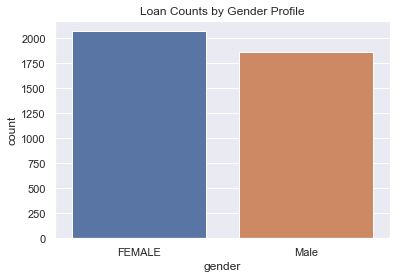

In [110]:
#seaborn countplot using gender colum from dataset
sns.countplot(x='gender',data=df);
#https://datascienceplus.com/seaborn-categorical-plots-in-python/
#give the plot a title
plt.title("Loan Counts by Gender Profile")
#show the plot
plt.show()

From the plot above and our stats we can see that the distribution can be classed as a uniform distribution. We will use this distribution further on when creating our random sample data.

In [ ]:
### Analyse Month of Application Data and Distribution

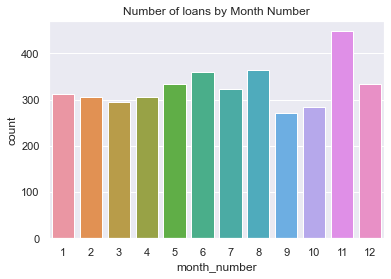

In [109]:
#create a seabron countplot of month number
sns.countplot(data=df, x = "month_number");
#give the plot a title
plt.title ("Number of loans by Month Number")
#shot the plot
plt.show()

From above I think a uniform distribution would best match my sample data. 

### Visualise Some of the Relationships between Variables

I am going to look at some of the relationships between some of the the variables. This can be done by utilising a number of graphs and plots available within python libraries. I will also take a look at the correlatioin between some of the varibales using the tools availabel from Numpy and possibly from Pandas.

#### Relationship betwen Age and Gender

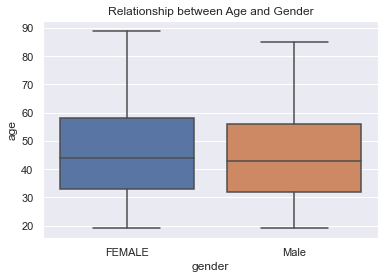

In [119]:
#using seaborn boxplot with x and y variables to visuale relationship between age and gender
sns.boxplot(x='gender',y="age",data=df);
#give the plot a title
plt.title("Relationship between Age and Gender")
plt.show()

We can see from above that the breakdown of gender by age group that it is quiet similar with the main concetration in the 30 to 60 age group for both males and females - we will test our sample generated further to see can we get it to match as close to above as possible.

#### Loan Purpose by Age and Gender Breakdown

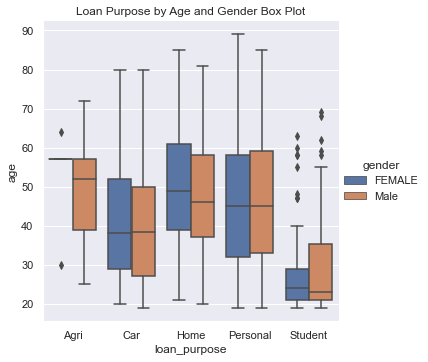

In [148]:
#using seaborn boxplot with x and y variables to visuale relationship between age and loan purpose
sns.catplot(x="loan_purpose", y="age", hue="gender", kind="box", data=df); #https://seaborn.pydata.org/tutorial/categorical.html
#give the plot a title
plt.title("Loan Purpose by Age and Gender Box Plot")
#show the plot
plt.show()

As shown above this catplot from seaborn shows a very nice visual represenation between the loan pupose selcted by the borrower based on their age and gender. 
Some interesting points to take from this 
mthe breakdown is very much 50/50 between teh loan purpose selected for both females and males expect for 
- Agri prupose where we can now determine it is predominenlty males aged between 40 and 58 - which is probably no suprise
- Suprisingly for me More males tend to take studeent loans than females - however it is quiet evident that student loans as we would expect are taken by members aged in thh 20 to 35 age group with the average approx 22/23 year old
- Apart from Student loans the average age of borrowers is approx between 38 and 50 in most cases. This stat would also suggests that this is the main catchemnt group and possibly younger members are either not borrowing or borrowing elsewhere.

In [142]:
#fig, (ax1,ax2) = plt.subplots(ncols = 2, sharey=True)
#sns.catplot(x="gender", y="age", hue="loan_purpose", kind="bar", data=df);
#sns.countplot(x='loan_purpose',hue="gender" , data=df, ax = ax1);
#sns.countplot(x='loan_purpose',hue="gender" , data=df, ax = ax2);

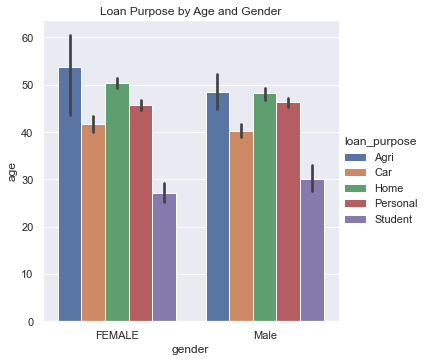

In [143]:
##using seaborn boxplot using x y varibaes and using loan purpoose as the "hue" for visualisation
sns.catplot(x="gender", y="age", hue="loan_purpose", kind="bar", data=df);
#give the plot a title
plt.title("Loan Purpose by Age and Gender")
#show the plot
plt.show()

Above is also another very good visulation of the loan pupose is gender is most likely to borrwer for and the average age these borrowers. We can see again based on the use of the black line the average age of the borrower per loan purpose.

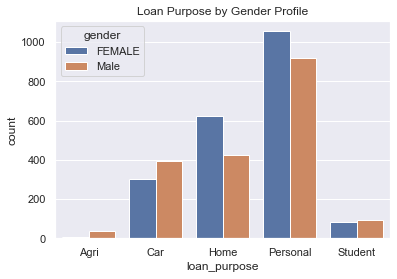

In [154]:
#set the style of the countplot
sns.set(style="darkgrid")
#generate a countplot of loan purpose
sns.countplot(x='loan_purpose',hue="gender" , data=df)
#show the title
plt.title ("Loan Purpose by Gender Profile")
#plot the graph
plt.show()

In [25]:
#https://towardsdatascience.com/hands-on-python-data-visualization-seaborn-count-plot-90e823599012

The above countplot from the seaborn library shows the breakdown of loan pupose by gender. It is a good visulisation to see the product (loan pupose) each gender decides upon. Observations - more males borrow for cars, studnet and agir  loans however females tend to borrow more for Home and Personal purposes and these are the most popular loan purposes.

### Loan Purpose by Month of Application

Here i will look at the loan application pupoose by the month of the application. I have already covereted the month of application to a number and I will use this field. I could also use the Month of applicatioin field if i wished.

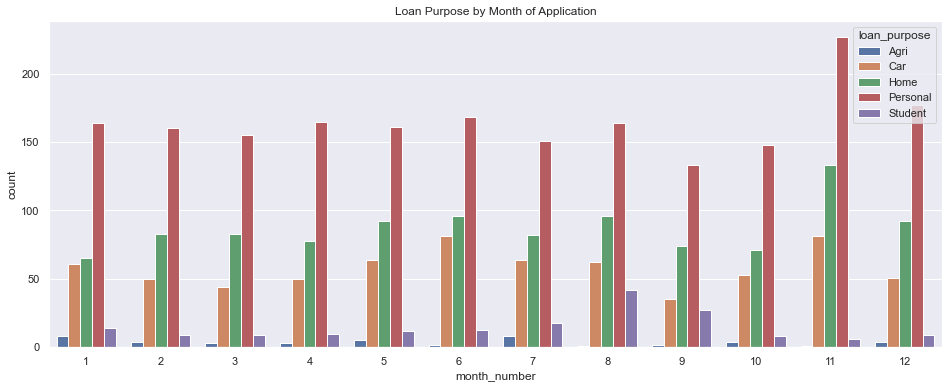

In [157]:
plt.figure(figsize=(16,6))#used to extend size of grapch for better visual
#display using a seaborn countplot
plt.title("Loan Purpose by Month of Application")
#create a count plot for the month number and loan purpose
sns.countplot(x='month_number',hue="loan_purpose" , data=df);
#display the plot
plt.show()

The above graph give us some very interesting insights into the data for the loan purpose by the month of application.

- The number personal loans is consistent through the year with a spike in November suggesting more personal loan applications in the lead up to christas
- The number of Student loans is at its highest around August with teh second highest month of applications being September, this would suggest the majority of students/parents will be looking at their school or 3rd level expenses at this time which is to be expected.

Seaborn library has a great heat map visual tool that can be used to map the correlations between categories. The higher the number is the greater the correlation between the two elements. A high positive corrleation indicates that the two elements have a positive linear relationship (as one increases the other also increase), and a low negative correlation indicates a negative linear relationship( as one increases the other decreases)

link reference to medium here

### Correlation between Numerical Variables

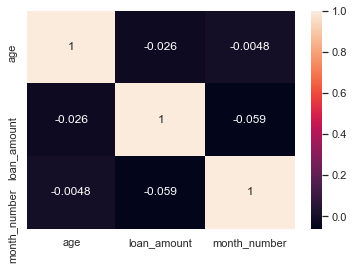

In [104]:
sns.heatmap(df.corr(),annot= True); #insert link here from medium that i used from below

We  can also calculate the correlation between any two variables by using the code below however i found the visul heatmap above a great way of displaying the results. Below can also be achived in pands using df.corr but as the basis of this project is numpy i will use np.corrcoef in  my example.

In [162]:
corr_matrix = np.corrcoef(df['age'],df["loan_amount"],)
corr_matrix

array([[ 1.        , -0.02574577],
       [-0.02574577,  1.        ]])

### Frequency Table

In my research i found the following very interesting which is a method of finding the distribution between two categorial variables - reference - https://www.pluralsight.com/guides/finding-relationships-data-with-python
A crosstab function can be used to create a  two way table between two variables - below i will create a two way table between the categorical varibales loan_purpose and gender

In [170]:
#using the pandas crosstab function
#pd.crosstab(df["loan_purpose"],df["gender"])
pd.crosstab(df["loan_purpose"],df["employment_status"])

employment_status,CONTRACT,FULL TIME,HOMEMAKER,PART TIME,RETIRED,SOCIAL WELFARE,STUDENT,UNEMPLOYED
loan_purpose,,,,,,,,
Agri,0,37,0,3,3,1,0,1
Car,0,516,8,60,47,11,15,39
Home,0,633,18,86,144,35,0,129
Personal,4,981,34,187,239,75,23,430
Student,0,56,0,31,2,0,84,4


#### Visualising some relationships using a Pairplot.

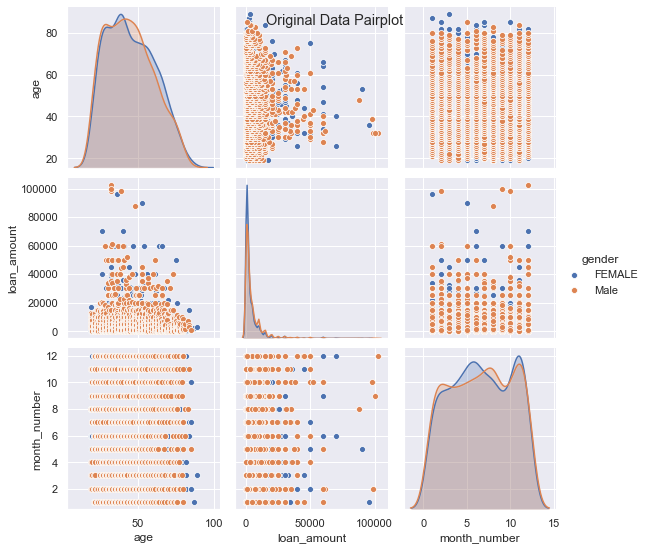

In [153]:
sns.pairplot(df,hue ="gender");
#show the title
plt.suptitle("Original Data Pairplot");
plt.show()

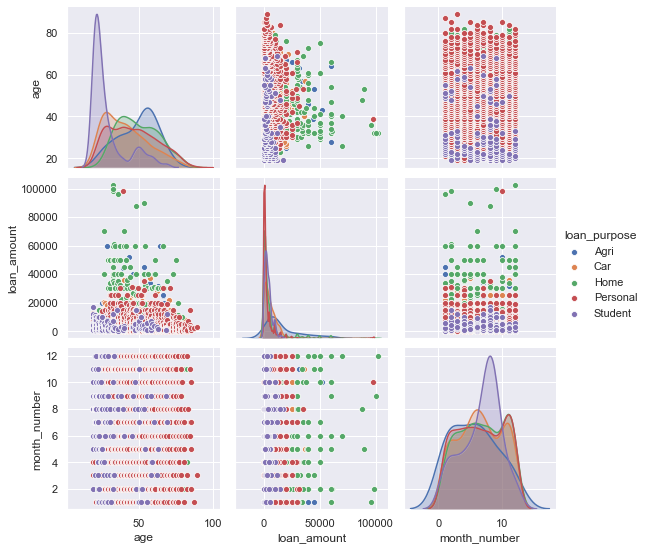

In [27]:
#using the seaborn pairplot - set the due to loan purpose for better visualisation 
sns.pairplot(df,hue ="loan_purpose");

## Create the sample random data



I am now going to simulate a new sample dataset matching as closely as possible to the imported dataset above which i have analysed.

My new sample dataset will have x number of colums containing 4,000 rows of data.

The new colums will be as follows

- random_age
- random_gender_
- random_loan_purpose

## AGE SAMPLE DATA

Firstly we will set the number of samples for our dataset which for this project is 4,000

In [30]:
#set/define our number of samples
n_samples = 4000

Start with the creation of the sample data as per the Age column - as i said above i believe the distribtion of the Age variable is closest aligned to that of a Triangular Distribution. 

I am going to use the pands df.describe fuction to get the mean and standard deviation of the data in the Age column and we will incorporate this into our numpy triangular distribution function to create our sample data. I wanted to use a distribution where i could define my mix and max ageas and also use the meean from my imported dataset.

In [31]:
#using pandas .describe fucntion on our age column.
df.age.describe()

count    3936.000000
mean       45.241362
std        15.595089
min        19.000000
25%        32.000000
50%        44.000000
75%        57.000000
max        89.000000
Name: age, dtype: float64

In [32]:
#from above result we can set our mean_age and deviation_age
mean_age = 45.241362

The numpy.random.triangular fucntion is as follows - ref numpy.org
numpy.random.triangular(left, mode, right, size)

In [33]:
#create the column random_age using numpys random distribution t - covert to integer
random_age = np.random.triangular(19,mean_age,89,n_samples).astype(np.int)

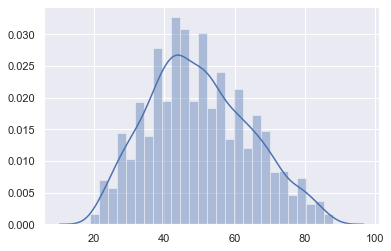

In [34]:
#use seaborns displot to visulise results 
sns.distplot(random_age);

I am happy that i have been able to set the min and max age and that my average is approx 45 - it is not 100% correct but as this is used for sample data i will run with this 

## LOAN PURPOSE SAMPLE DATA

I have already coverted the date in loan purpose to a category as I am aware there are not that many unique values and that type of date is ideal for as data type category.  

I am going to create a new list from the unique values in my column.

In [35]:
#create new list sample loan types from unique values in loan_purpose from my dataframe
sample_loan_types = df['loan_purpose'].unique().tolist()
#https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/
sample_loan_types

['Car', 'Student', 'Personal', 'Home', 'Agri']

So from above I  know there are 5 unique loan purposes and i have created a new list sample_loan_types which contains these values 

###### Setting my probabilities 

I found useful information as reference below on how to covert my loan_pupose counts into a dict. 
The key being returnend in the Dict is the loan purpose and we can see that it returns the calculated perecentate as a fraction being the number of times each appeared for example below we can see that borrowers opted for a personal loan in over 50% of cases

In [36]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
#https://stackoverflow.com/questions/29403192/convert-series-returned-by-pandas-series-value-counts-to-a-dictionary
org_loan_types_prob =dict(df['loan_purpose'].value_counts(True).round(2))
print("Orginal calc prob /" ,org_loan_types_prob)

Orginal calc prob / {'Personal': 0.5, 'Home': 0.27, 'Car': 0.18, 'Student': 0.04, 'Agri': 0.01}


We are now going to use the values returned above to set our probabilites our random.choice function. I had to be careful to match teh proabilites to teh values exaclty as how they appeared in the list sample_loan_types

In [37]:
#create our random loan data using random.choice and the proababilities
#0.176829,0.044970,0.501270,0.265498,0.011433
random_loan_purpose = np.random.choice(sample_loan_types, size=n_samples,p=[0.176829,0.044970,0.501270,0.265498,0.011433])
#create a test dataframe dftest
dftest = pd.DataFrame({'random_loan_purpose':random_loan_purpose})
#create a new dict from above to test values returned against original 
probabilty_test =dict(dftest['random_loan_purpose'].value_counts(True).round(2))
print("Sample calc probabilites /",probabilty_test)
print("Orginal calc prob /" ,org_loan_types_prob)

Sample calc probabilites / {'Personal': 0.51, 'Home': 0.26, 'Car': 0.17, 'Student': 0.05, 'Agri': 0.01}
Orginal calc prob / {'Personal': 0.5, 'Home': 0.27, 'Car': 0.18, 'Student': 0.04, 'Agri': 0.01}


Ok so we can see from the above the proability of the loan purpose appearing in our sample dataset is closely aligned to the probability of that in our new sample random data set.

## GENDER SAMPLE DATA

In [38]:
gender = ("Male", "Female")
random_gender = np.random.choice(gender,size = n_samples,p = [.45,.55])

#Random_Gender.describe
#Random_Gender

## Sample Loan amounts

In [39]:
df["loan_amount"].describe().round()

count      3936.0
mean       4756.0
std        8384.0
min           0.0
25%         700.0
50%        2000.0
75%        5000.0
max      102500.0
Name: loan_amount, dtype: float64

In [40]:
sample_loan_amounts_prob =dict(df['loan_amount'].value_counts(True))
#sample_loan_amounts_prob

In [41]:
#there must be a random choices in Numpy not just from standard libruary?
#https://stackoverflow.com/questions/4859292/how-to-get-a-random-value-from-dictionary-in-python
#https://stackoverflow.com/questions/40927221/how-to-choose-keys-from-a-python-dictionary-based-on-weighted-probability
import random
random_loan_amount = random.choices(list(sample_loan_amounts_prob.keys()), weights=sample_loan_amounts_prob.values(), k=n_samples)
#random_loan_amounts

In [42]:
#create some random varibales just for testing at the minute
#researched https://www.delftstack.com/howto/python-pandas/how-to-randomly-shuffle-dataframe-rows-in-pandas/
#Loan_Types = ("Personal", "Car", "Agri", "Student","Home" )


#Create a test data frame based on above to see does it work
sample_df = pd.DataFrame({'Sample_Age':random_age ,
                   'Sample_Loan_Purpose':random_loan_purpose ,
                   'Sample_Gender': random_gender ,
                          'Sample_Loan_Amount':random_loan_amount
                  })

In [43]:
sample_df
#np.random.permutation(sample_df)

,Sample_Age,Sample_Loan_Purpose,Sample_Gender,Sample_Loan_Amount
0,45,Personal,Male,500.0
1,55,Car,Male,1300.0
2,53,Car,Male,2800.0
3,39,Car,Female,10000.0
4,31,Personal,Male,2000.0
...,...,...,...,...
3995,56,Agri,Male,2500.0
3996,55,Car,Female,20000.0
3997,32,Home,Male,3000.0
3998,28,Personal,Male,6000.0


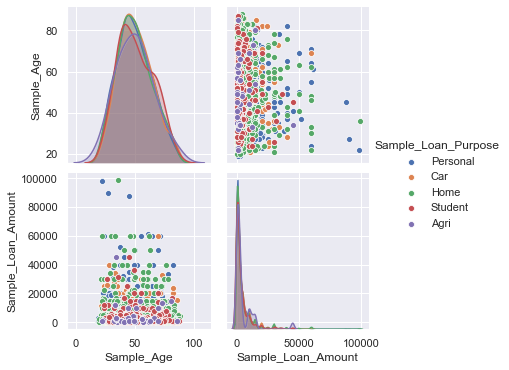

In [149]:
sns.pairplot(sample_df,hue ="Sample_Loan_Purpose");
#Sample_Loan_Type

In [45]:
sample_df.describe().round(2)

,Sample_Age,Sample_Loan_Amount
count,4000.00,4000.00
mean,49.94,4586.63
std,14.44,7500.12
min,19.00,0.00
25%,39.00,700.00
50%,49.00,2000.00
75%,60.00,5000.00
max,88.00,98600.00


In [46]:
df.describe().round(2)

,age,loan_amount,month_number
count,3936.00,3936.00,3936.00
mean,45.24,4755.63,6.67
std,15.60,8383.67,3.46
min,19.00,0.00,1.00
25%,32.00,700.00,4.00
50%,44.00,2000.00,7.00
75%,57.00,5000.00,10.00
max,89.00,102500.00,12.00


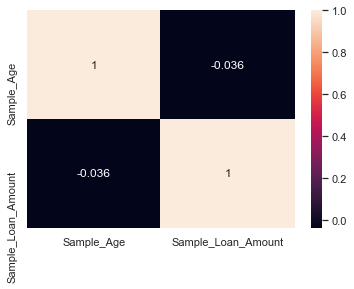

In [47]:
sns.heatmap(sample_df.corr(),annot= True); #insert link here from medium that i used fro below

In [48]:
Comparing 

NameError: name 'Comparing' is not defined

In [ ]:
#using seaborn boxplot with x and y variables to visuale relationship between age and loan purpose
sns.catplot(x="Sample_Loan_Purpose", y="Sample_Age", hue="Sample_Gender", kind="box", data=sample_df);
#https://seaborn.pydata.org/tutorial/categorical.html

Do Some Predictions?

Model and Train?

Digging a bit futher - summary by years 

In [ ]:
#df.Age.plot(kind='kde');
#df.groupby('Gender').Age.plot(kind='kde')
#df.Age.plot(kind='kde')


#Random_Age = np.random.randint(19, 89, n_samples)
#Random_Age = np.random.normal(45.241362,15.595089,n_samples).astype(int)
#Random_Age = np.random.rayleigh(45.241362,n_samples).astype(int)



#sns.distplot(Age);
#df.groupby("Age").Loan.count()
#df.count(["Loan Purpose"])
#test = df['Loan Purpose'].count
#test


#df.Age.plot(kind='kde');
#df.groupby('Gender').Age.plot(kind='kde')
#df.Age.plot(kind='kde')
#Loan Amount = df["Loan Amount"]